### TODO: Add markdown to this file.

Add some markdown here.

In [16]:
"""
Analysis of New York City Income Data Versus Ethnicity
"""
import os

import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.ticker as ticker

import numpy as np
import pandas as pd

# Declare and initialize file names.
DEMOGRAPHICS_FILENAME = 'Demographic_Statistics_By_Zip_Code.csv'
NY_WITH_AGI_FILENAME = 'ny_agi.csv'
NY_WITHOUT_AGI_FILENAME = 'ny_no_agi.csv'
NYC_WITH_AGI_FILENAME = 'nyc_agi.csv'
NYC_WITHOUT_AGI_FILENAME = 'nyc_no_agi.csv'
WITH_AGI_FILENAME = '15zpallagi.csv'
WITHOUT_AGI_FILENAME = '15zpallnoagi.csv'

# Declare and initialize dictionary keys for plotting.
COLOR_KEY = 'color_key'
ETHNICITY_KEY = 'ethnicity_key'
LESS_KEY = 'less_key'
MORE_KEY = 'more_key'

# Declare and initialize other constants.
STATE = 'NY'
ZIP_CODE_FEATURE = 'zip_code'

# Declare and initialize paths.
UW_PATH = os.path.join(os.sep, 'home', 'gary', 'UW Data Science',
                       'DATA 512', 'Project')
PYCHARM_PATH = os.path.join(os.sep, 'home', 'gary',
                            'PycharmProjects', 'NYC_Study')
PROJECT_PATH = PYCHARM_PATH
IRS_PATH = os.path.join(PROJECT_PATH, "IRS")
NYC_PATH = os.path.join(PROJECT_PATH, "NYC")


def format_money(amount, pos):
    """
    Formats money for the 'y' axis of a plot.

    :param amount: The amount
    :type amount: int
    :param pos: The position argument
    :type pos: int
    :return: A formatted money string
    :rtype: str
    """
    # pylint: disable=unused-argument
    return '${:,.0f}'.format(amount)


def format_percent(percentage, pos):
    """
    Formats percentages for the 'x' axis of a plot.

    :param percentage: The fraction between 0.0 and 1.0
    :type percentage: float
    :param pos: The position argument
    :type pos: int
    :return: A formatted percentage string
    :rtype: str
    """
    # pylint: disable=unused-argument
    return '{:.0f}%'.format(percentage * 100.)


def get_demographics():
    """
    Read demographic data for New York City.

    :return: A dataframe with demographic data for New York City.
    :rtype: pandas.core.frame.DataFrame
    """

    print(os.path.join(NYC_PATH, DEMOGRAPHICS_FILENAME))
    return pd.read_csv(os.path.join(NYC_PATH, DEMOGRAPHICS_FILENAME))


def get_demographic_data():
    """
    Read demographic data for New York City and modifies it.

    :return: A dataframe with demographic data for New York City.
    :rtype: pandas.core.frame.DataFrame
    """
    return modify_demographic_data(get_demographics())


def get_income_data_with_agi(zip_codes):
    """
    Gets income data with AGI for New York City and modifies it.

    :param data_frame: A data frame containing a 'ZIPCODE' field
    :type data_frame: pandas.core.frame.DataFrame
    :param target_zipcodes: A collection of ZIP codes
    :type target_zipcodes: set or list-like
    :return: A data frame containing record with only the given ZIP code
    values
    :rtype: pandas.core.frame.DataFrame
    """

    data_frame = get_ny_with_agi()
    data_frame = get_nyc_with_agi(data_frame, zip_codes)
    return modify_income_data_with_agi(data_frame)


def get_income_data_without_agi(zip_codes):
    """
    TODO: Fill this in.

    :param zip_codes:
    :type zip_codes:
    :return:
    :return:
    :rtype:
    """

    data_frame = get_ny_without_agi()
    data_frame = get_nyc_without_agi(data_frame, zip_codes)
    return modify_income_data_without_agi(data_frame)


def get_ny_common(reduced_filename, whole_filename):
    """
    Gets income data for the state of New York.  Writes the existing data frame
    if it does not already exist, and returns it.

    :param reduced_filename: The name of the New York only data file
    :type reduced_filename: str
    :param whole_filename: The name of the all-USA data file
    :type whole_filename: str
    :return: A data frame containing income data only for the state of New York
    :rtype: pandas.core.frame.DataFrame
    """

    # Calculate the path of the reduced file.  Does the file already exist?
    reduced_filepath = os.path.join(IRS_PATH, reduced_filename)
    if os.path.isfile(reduced_filepath):

        # The file already exists.  Just read it.
        print('New York file already exists...')
        data_frame = pd.read_csv(reduced_filepath)

    else:

        # The file doesn't exist.  Create it.
        print('New York file does not exist; creating it...')
        data_frame = isolate(reduced_filepath,
                             pd.read_csv(os.path.join(IRS_PATH,
                                                      whole_filename)),
                             STATE)

    # Return the read, or newly created data frame.
    return data_frame


def get_nyc_common(reduced_filename, data_frame, target_zipcodes,
                   zipcode_fieldname='zipcode'):
    """
    Gets income data for the New York City.  Write the existing data frame
    if it does not already exist, and returns it.

    :param reduced_filename: The name of the New York City only data file
    :type reduced_filename: str
    :param data_frame: A dataframe containing income data to be screened
    :type data_frame: pandas.core.frame.DataFrame
    :param target_zipcodes: A collection of ZIP codes
    :type target_zipcodes: set or list-like
    :param zipcode_fieldname The name of the field in the data frame containing
    ZIP codes
    :type zipcode_fieldname str
    :return: A data frame containing income data only for the New York City
    :rtype: pandas.core.frame.DataFrame
    """

    reduced_filepath = os.path.join(IRS_PATH, reduced_filename)
    if os.path.isfile(reduced_filepath):

        print('New York City file already exists...')
        reduced_data_frame = pd.read_csv(reduced_filepath)

    else:

        print('New York City files does not exist; creating it...')
        reduced_data_frame = isolate_nyc(reduced_filepath,
                                         data_frame,
                                         target_zipcodes,
                                         zipcode_fieldname)

    return reduced_data_frame


def get_ny_with_agi():
    """
    Gets income data with AGI for the state of New York.  Writes the resulting
    data frame if it does not already exist, and returns it.

    :return: A data frame containing income data with AGI only for the state of
    New York
    :rtype: pandas.core.frame.DataFrame
    """

    return get_ny_common(NY_WITH_AGI_FILENAME, WITH_AGI_FILENAME)


def get_ny_without_agi():
    """
    Gets income data without AGI for the state of New York.  Writes the
    resulting data frame if it does not already exist, and returns it.

    :return: A data frame containing income data without AGI only for the state
    of New York
    :rtype: pandas.core.frame.DataFrame
    """

    return get_ny_common(NY_WITHOUT_AGI_FILENAME, WITHOUT_AGI_FILENAME)


def get_nyc_with_agi(data_frame, target_zipcodes):
    """
    Gets income data with AGI for New York City.  Writes the resulting
    data frame if it does not already exist, and returns it.

    :param data_frame: A data frame containing a 'ZIPCODE' field
    :type data_frame: pandas.core.frame.DataFrame
    :param target_zipcodes: A collection of ZIP codes
    :type target_zipcodes: set or list-like
    :return: A data frame containing record with only the given ZIP code
    values
    :rtype: pandas.core.frame.DataFrame
    """

    return get_nyc_common(NYC_WITH_AGI_FILENAME, data_frame, target_zipcodes)


def get_nyc_without_agi(data_frame, target_zipcodes):
    """
    Gets income data without AGI for New York City.  Writes the resulting
    data frame if it does not already exist, and returns it.

    :param data_frame: A data frame containing a 'ZIPCODE' field
    :type data_frame: pandas.core.frame.DataFrame
    :param target_zipcodes: A collection of ZIP codes
    :type target_zipcodes: set or list-like
    :return: A data frame containing record with only the given ZIP code
    values
    :rtype: pandas.core.frame.DataFrame
    """

    return get_nyc_common(NYC_WITHOUT_AGI_FILENAME, data_frame,
                          target_zipcodes, zipcode_fieldname='ZIPCODE')


def isolate(output_filepath, data_frame, target_state):
    """
    Isolates records in a data frame.  Records must contain a 'STATE' field.
    Writes the resulting data frame to a csv file with a given name, and
    returns the data frame.

    :param output_filepath: The path to a file where the data frame will be
    written
    :type output_filepath: str
    :param data_frame: A data frame containing a 'STATE' field
    :type data_frame: pandas.core.frame.DataFrame
    :param target_state: The records in the resulting data frame will only
    contain this state value
    :type target_state: str
    :return: A data frame containing records with only the given state value
    :rtype: pandas.core.frame.DataFrame
    """

    reduced_data_frame = data_frame[data_frame.STATE == target_state]
    reduced_data_frame.to_csv(output_filepath)
    return reduced_data_frame


def isolate_nyc(output_filepath, data_frame, target_zipcodes,
                zipcode_fieldname='zipcode'):
    """
    Isolates records in a data frame.  Records must contain a 'ZIPCODE' field.
    Writes the resulting data frame to a csv file with a given name, and
    returns the reduced data frame.

    :param output_filepath: The path to a file where the data frame will be
    written
    :type output_filepath: str
    :param data_frame: A data frame containing a 'ZIPCODE' field
    :type data_frame: pandas.core.frame.DataFrame
    :param target_zipcodes: A collection of ZIP codes
    :type target_zipcodes: set or list-like
    :param zipcode_fieldname The name of the field in the data frame containing
    ZIP codes
    :type zipcode_fieldname str
    :return: A data frame containing record with only the given ZIP code
    values
    :rtype: pandas.core.frame.DataFrame
    """

    reduced_data_frame =\
        data_frame[data_frame[zipcode_fieldname].isin(target_zipcodes)]
    reduced_data_frame.to_csv(output_filepath)
    return reduced_data_frame


def modify_demographic_data(data_frame):
    """
    Modifies demographic data.  Retains only required columns, and renames
    required columns.

    :param data_frame: A data frame with required columns given in the column
    map embedded in this function
    :type data_frame: pandas.core.frame.DataFrame
    :return: A data frame as modified in the description of this method
    :rtype: pandas.core.frame.DataFrame
    """

    # Map existing column names to their new names.
    column_map = {'JURISDICTION NAME': ZIP_CODE_FEATURE,
                  'COUNT PARTICIPANTS': 'participants',
                  'COUNT PACIFIC ISLANDER': 'islander',
                  'PERCENT PACIFIC ISLANDER': 'pcnt_islander',
                  'COUNT HISPANIC LATINO': 'latino',
                  'PERCENT HISPANIC LATINO': 'pcnt_latino',
                  'COUNT AMERICAN INDIAN': 'native',
                  'PERCENT AMERICAN INDIAN': 'pcnt_native',
                  'COUNT ASIAN NON HISPANIC': 'asian',
                  'PERCENT ASIAN NON HISPANIC': 'pcnt_asian',
                  'COUNT WHITE NON HISPANIC': 'caucasian',
                  'PERCENT WHITE NON HISPANIC': 'pcnt_caucasian',
                  'COUNT BLACK NON HISPANIC': 'african',
                  'PERCENT BLACK NON HISPANIC': 'pcnt_african',
                  'COUNT OTHER ETHNICITY': 'other',
                  'PERCENT OTHER ETHNICITY': 'pcnt_other',
                  'COUNT ETHNICITY UNKNOWN': 'unknown',
                  'PERCENT ETHNICITY UNKNOWN': 'pcnt_other',
                  'COUNT ETHNICITY TOTAL': 'total',
                  'PERCENT ETHNICITY TOTAL': 'pcnt_total'
                 }

    # Remove all but the key columns in the map.
    data_frame = data_frame[list(column_map.keys())]

    # Rename the columns, and return the data frame.
    data_frame = data_frame.rename(index=str, columns=column_map)
    return data_frame


def modify_income_data_with_agi(data_frame):
    """
    Modifies income data that has an AGI breakdown.  Retains only required
    columns, renames required columns, renames values in the AGI limit
    column, and converts the number of returns column from floating point
    to integer.

    :param data_frame: A data frame with required columns given in the column
    map embedded in this function
    :type data_frame: pandas.core.frame.DataFrame
    :return: A data frame as modified in the description of this method
    :rtype: pandas.core.frame.DataFrame
    """

    # Define some column names.
    agi_column = 'agi_limit'
    returns_column = 'return_count'

    # Map existing column names to their new names.
    column_map = {'zipcode': ZIP_CODE_FEATURE,
                  'agi_stub': agi_column,
                  'N1': returns_column}

    # Remove all but the key columns in the map.
    data_frame = data_frame[list(column_map.keys())]

    # Rename the columns.
    data_frame = data_frame.rename(index=str, columns=column_map)

    # Replace the values in the agi_column with something more meaningful
    value_map = {1: '$25,000', 2: '$50,000', 3: '$75,000',
                 4: '$100,000', 5: '$200,000', 6: '$infinity'}
    for key in value_map.keys():
        data_frame[agi_column].replace(key, value_map.get(key), inplace=True)

    # Convert the returns_column to integer, and return the data frame.
    data_frame[returns_column] = data_frame[returns_column].astype(int)
    return data_frame


def modify_income_data_without_agi(data_frame):
    """
    Modifies income data that has no AGI breakdown.  Retains only required
    columns, renames required columns, and calculates average income.

    :param data_frame: A data frame with required columns given in the column
    map embedded in this function
    :type data_frame: pandas.core.frame.DataFrame
    :return: A data frame as modified in the description of this method
    :rtype: pandas.core.frame.DataFrame
    """

    # Define some column names.
    average_income_column = 'average_income'
    return_count_column = 'number_of_returns'
    total_income_column = 'total_income_thsnds'

    # Map existing column names to their new names.
    column_map = {'ZIPCODE' : ZIP_CODE_FEATURE,
                  'N02650' : return_count_column,
                  'A02650' : total_income_column}

    # Remove all but the key columns in the map.
    data_frame = data_frame[list(column_map.keys())]

    # Rename the columns.
    data_frame = data_frame.rename(index=str, columns=column_map)

    # Calculate average total income, and return the data frame.
    data_frame[average_income_column] =\
        np.round(data_frame[total_income_column] * 1000. /\
        data_frame[return_count_column], 2)
    return data_frame


def plot_lines(ethnicities, minimum_income=0, maximum_income=200000):
    """
    Plots lines associated with income based on ethnic makeup.

    :param ethnicities: A list or tuple of dictionaries
    :type ethnicities: list or tuple
    :return: None
    :rtype: None
    """

    # Create a figure, and give it a subplot.
    figure = plt.figure(figsize=(10, 5))
    subplot = figure.add_subplot(111)

    # Create a labels list, and cycle for each ethnicity.
    labels = []
    for ethnicity in ethnicities:

        # Add a label and a line for the first/next ethnicity.
        labels.append(ethnicity[ETHNICITY_KEY])
        subplot.add_line(line=lines.Line2D((-0.1, 1.1),
                                           (ethnicity[LESS_KEY], ethnicity[MORE_KEY]),
                                           color=ethnicity[COLOR_KEY]))

    # Set suitable limits for the 'x' and 'y' axes.
    subplot.set_xlim(0.0, 1.0)
    subplot.set_ylim(minimum_income, maximum_income)

    # Give each axis an appropriate formatter.
    subplot.xaxis.set_major_formatter(ticker.FuncFormatter(format_percent))
    subplot.yaxis.set_major_formatter(ticker.FuncFormatter(format_money))

    # Give the axes appropriate labels, and give the plot a title.
    plt.xlabel('Percent Ethnic Makeup')
    plt.ylabel('Average Income')
    plt.title('Average Income as a Function of Percent Ethnicity in NYC by ZIP Code')

    # Give the plot a legend, and show the plot.
    subplot.plot(len(ethnicities))
    subplot.legend(labels)
    plt.show()

/home/gary/PycharmProjects/NYC_Study/NYC/Demographic_Statistics_By_Zip_Code.csv
New York file already exists...
New York City file already exists...
     zip_code  participants  islander  pcnt_islander  latino  pcnt_latino  \
0       10001            44         0           0.00      16         0.36   
1       10002            35         0           0.00       1         0.03   
2       10003             1         0           0.00       0         0.00   
3       10004             0         0           0.00       0         0.00   
4       10005             2         0           0.00       0         0.00   
5       10006             6         0           0.00       2         0.33   
6       10007             1         0           0.00       0         0.00   
7       10009             2         0           0.00       0         0.00   
8       10010             0         0           0.00       0         0.00   
9       10011             3         0           0.00       1         0.33   
10  

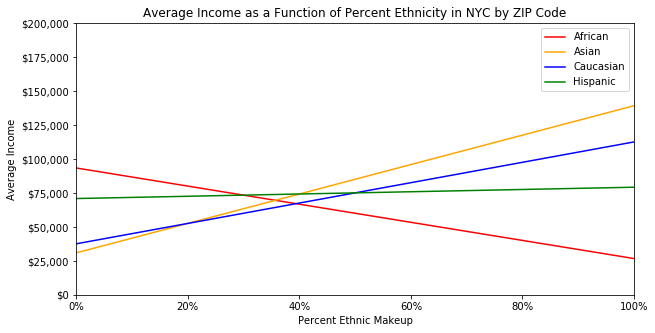

   Ethnicity  Std. Error p-value
0    African     0.16014  <2e-16
1      Asian     0.17214  <2e-16
2  Caucasian     0.18010  <2e-16
3   Hispanic     0.15142  <2e-16


In [18]:
# Get the fully formatted demographic data and income data.
demographics = get_demographic_data()

# income = get_income_data_with_agi(demographics[ZIP_CODE_FEATURE])
income = get_income_data_without_agi(demographics[ZIP_CODE_FEATURE])

# Print the demographic data.
print(demographics)

# Print the income data.
print(income)

# Make a sample plot of ethnicities.
groups = ({COLOR_KEY : 'red',
           ETHNICITY_KEY : 'African',
           LESS_KEY : 100000,
           MORE_KEY : 20000},

          {COLOR_KEY : 'orange',
           ETHNICITY_KEY : 'Asian',
           LESS_KEY : 20000,
           MORE_KEY : 150000},

          {COLOR_KEY : 'blue',
           ETHNICITY_KEY : 'Caucasian',
           LESS_KEY : 30000,
           MORE_KEY : 120000},

          {COLOR_KEY : 'green',
           ETHNICITY_KEY : 'Hispanic',
           LESS_KEY : 70000,
           MORE_KEY : 80000})

plot_lines(groups)

signficance = pd.DataFrame({'Ethnicity' : ('African', 'Asian', 'Caucasian', 'Hispanic'),
                            'Std. Error' : (0.16014, 0.17214, 0.1801, 0.15142),
                            'p-value' : '<2e-16'})
print(signficance)                                                                                                                       